In [1]:
%matplotlib inline 

# EDA
***

# TODOS:
Validata before working on data that no NAN appear

## Table of Contents
***
* [Aim](#aim)
* [Code Setup](#code-setup)
* [Data Import](#data-import)
* [Task 1 - Number of Products by Department](#task1)
* [Task 2 - How many Orders do Customers make?](#task2)
* [Task 3 - Number of Times Reordered](#task3)
* [Task 4 - Distrbution of Orders by Hour of Day](#task4)

## Aim <a class="anchor" id="aim"></a>
***

The aim of this notebook is to do some Exploratory data analysis on the provisioned Instacart Data

## Code Setup <a class="anchor" id="code-setup"></a>
***

### Constants

In [2]:
instacart_dir = "instacart_2017_05_01/"
my_orders_file = "my_orders.csv"
products_file = "products.csv"
aisles_file = "aisles.csv"
departments_file = "departments.csv"
orders_products_prior_file = "my_order_products__prior.csv"
orders_products_train_file = "my_order_products__train.csv"

### Import Libraries

In [3]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper")

### Useful Functions

### Size Function

In [4]:
def size(obj):
    """Return size of object in MB"""
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

### File Read

In [5]:
def read_csv_file(file_name):
    return pd.read_csv(instacart_dir + file_name)

## Data Import <a class="anchor" id="data-import"></a>
***

### Orders Data

In [6]:
orders = read_csv_file(my_orders_file)
print("Orders, dimension: ",orders.shape, "   size: ", size(orders))
orders.head()

Orders, dimension:  (306, 8)    size:  0.04 MB


,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12202,472199,765,prior,1,2,21,NaN
1,12203,1424394,765,prior,2,1,21,20.0
2,12204,889292,765,prior,3,6,21,30.0
3,12205,2809253,765,prior,4,3,20,30.0
4,12206,2392861,765,prior,5,1,12,19.0


### Products Data

In [7]:
products = read_csv_file(products_file)
print("Products, dimension: ",products.shape, "   size: ", size(products))
products.head()

Products, dimension:  (49688, 4)    size:  5.57 MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Departments Data

In [8]:
departments = read_csv_file(departments_file)
print("Departments, dimension: ",departments.shape, "   size: ", size(departments))
departments.head()

Departments, dimension:  (21, 2)    size:  0.00 MB


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### Aisles Data

In [9]:
aisles = read_csv_file(aisles_file)
print("Aisles, dimension: ",aisles.shape, "   size: ", size(aisles))
aisles.head()

Aisles, dimension:  (134, 2)    size:  0.01 MB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### Order Products Data

In [10]:
orders_products_prior = read_csv_file(orders_products_prior_file)
orders_products_train = read_csv_file(orders_products_train_file)
orders_products = pd.concat([orders_products_prior, orders_products_train])
print("Order Products, dimension: ",orders_products.shape, "   size: ", size(orders_products))
orders_products.head()

Order Products, dimension:  (2683, 5)    size:  0.13 MB


,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,147221,15511,429,1,0
1,147222,15511,46397,2,0
2,147223,15511,27323,3,0
3,147224,15511,28842,4,1
4,147225,15511,4605,5,0


## Task 1 - Number of Products by Department <a class="anchor" id="task1"></a>
***

### Dataframe of Products by Departments

In [11]:
# Create the count of products for department_id
product_department_count = (products[["department_id", "product_id"]]
                            .groupby(["department_id",])
                            .size()
                            .reset_index(name='product_count')
                            .sort_values(by=['product_count'], ascending=False))
# Join in the Department to the above Dataframe so the Deparment name is available
product_department_count_info = product_department_count.merge(departments, on="department_id")
product_department_count_info.head(product_department_count_info.shape[0])


,department_id,product_count,department
0,11,6563,personal care
1,19,6264,snacks
2,13,5371,pantry
3,7,4365,beverages
4,1,4007,frozen
5,16,3449,dairy eggs
6,17,3085,household
7,15,2092,canned goods
8,9,1858,dry goods pasta
9,4,1684,produce


### Bar Chart or Product Count by Department

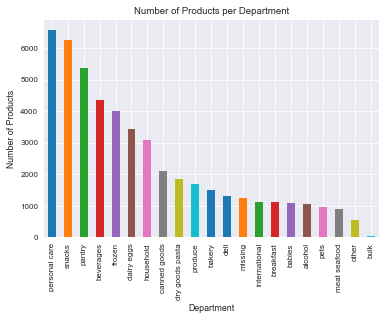

In [12]:
fig, ax = plt.subplots()
product_department_count_info['product_count'].plot.bar()
ax.set_xticklabels(product_department_count_info.department, rotation='vertical')
plt.title("Number of Products per Department")
plt.ylabel("Number of Products")
plt.xlabel("Department")
plt.show()

## Task 2 - How Many Orders do Customers Make <a class="anchor" id="task1"></a>
***

#### Dataframe of Order Counts per Customer

In [13]:
# Only take into account if the user id and order_id are present
filtered_orders = orders[["user_id", "order_id"]]
filtered_order = filtered_orders.dropna(thresh=1)
# Get count based on filtered orders
user_order_count = (filtered_orders
                    .groupby(["user_id",])
                    .size()
                    .reset_index(name='order_count')
                    .sort_values(by=['order_count'], ascending=False))
total_order_count = user_order_count["order_count"].sum()
print("Total Order Count : ", total_order_count, ". Total Number of Customers : ", user_order_count.shape[0])
# As list is sorted descending, head can be used to see top 5 customers
user_order_count.head()

Total Order Count :  306 . Total Number of Customers :  20


,user_id,order_count
4,47562,89
15,124199,46
7,70894,38
16,149715,28
9,83908,11


### Pie Chart of Order Counts per Customer
This may not be the best plot for showing all the users however it is clear to see that a large percentage or orders are made by a relatively small amount of users

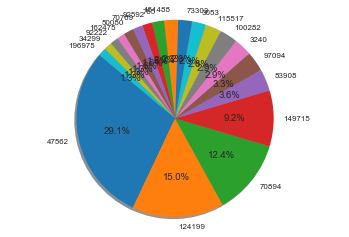

In [14]:
# Plot
plt.pie(user_order_count["order_count"], labels=user_order_count["user_id"],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Bar Chart of Order Counts per Customer

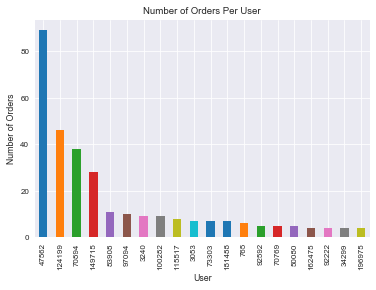

In [15]:
fig, ax = plt.subplots()
user_order_count['order_count'].plot.bar()
ax.set_xticklabels(user_order_count["user_id"], rotation='vertical')
plt.title("Number of Orders Per User")
plt.ylabel("Number of Orders")
plt.xlabel("User")
plt.show()

## Task 3 - Numer of Times Product Reordered <a class="anchor" id="task1"></a>
***
for this we should also do some graphs on products never reordered as well as products reordered by a specific user

### Products that have been Reordered

In [16]:
filtered_orders_products = orders_products.dropna(thresh=1)
product_reorder_count = (filtered_orders_products
                        .groupby("product_id")["reordered"]
                        .sum()
                        .to_frame()
                        .reset_index("product_id")
                        .sort_values(by=["reordered"], ascending=False)
                        )
product_reorder_count_info = product_reorder_count.merge(products, on="product_id")
# Get a data frame of all products that were reordered
products_with_reorders =product_reorder_count_info[product_reorder_count_info["reordered"] > 0]
print("Products with Reorders, dimension: ",products_with_reorders.shape, "   size: ", size(products_with_reorders))
products_with_reorders.head()

Products with Reorders, dimension:  (379, 5)    size:  0.05 MB


,product_id,reordered,product_name,aisle_id,department_id
0,40174,66,2% Reduced Fat Organic Milk,84,16
1,4942,51,Vanilla Almond Breeze,91,16
2,9387,39,Granny Smith Apples,24,4
3,24852,31,Banana,24,4
4,22124,29,Total 0% Raspberry Yogurt,120,16


### Products that have been Reordered Bar Chart

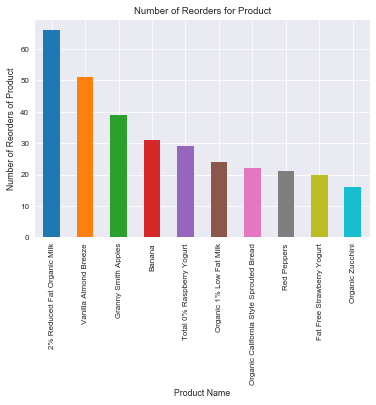

In [17]:
fig, ax = plt.subplots()
top_number_of_products = 10
products_with_reorders['reordered'].head(top_number_of_products).plot.bar()
ax.set_xticklabels(products_with_reorders["product_name"].head(top_number_of_products), rotation='vertical')
plt.title("Number of Reorders for Product")
plt.ylabel("Number of Reorders of Product")
plt.xlabel("Product Name")
plt.show()

### Products Reordered by User Dataframe

In [18]:
orders_products_with_user_info = filtered_orders_products.merge(orders, on="order_id")
reordered_products_with_user_info = orders_products_with_user_info[orders_products_with_user_info["reordered"] > 0]
reordered_products_with_user_info.head()

,Unnamed: 0_x,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0_y,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3,147224,15511,28842,4,1,2487349,149715,prior,13,0,12,6.0
7,147228,15511,4565,8,1,2487349,149715,prior,13,0,12,6.0
11,147232,15511,9741,12,1,2487349,149715,prior,13,0,12,6.0
27,257077,27068,24184,1,1,1179394,70894,prior,5,0,17,6.0
31,257081,27068,4605,5,1,1179394,70894,prior,5,0,17,6.0


In [19]:
reordered_product_count_per_user = (reordered_products_with_user_info.groupby(["user_id", "product_id"])["reordered"]
                                    .sum()
                                    .to_frame()
                                    .reset_index("user_id")
                                    .reset_index("product_id")
                                    .merge(products, on="product_id")
                                    .sort_values(by=["reordered"], ascending=False)
                                   )
print("This dataframe shows what each user reordered")
reordered_product_count_per_user.head()

This dataframe shows what each user reordered


,product_id,user_id,reordered,product_name,aisle_id,department_id
141,40174,47562,66,2% Reduced Fat Organic Milk,84,16
72,4942,47562,51,Vanilla Almond Breeze,91,16
77,9387,47562,38,Granny Smith Apples,24,4
102,22124,47562,29,Total 0% Raspberry Yogurt,120,16
320,10070,124199,24,Organic 1% Low Fat Milk,84,16


As can be see above the user with id 47562 reorders the most which makes sense as this user is responsbile for 29.1% of the overall orders

### Products that have never been Reordered

In [20]:
# Get a data frame of all products that were never reordered
products_without_reorders =product_reorder_count_info[product_reorder_count_info["reordered"] <= 0]
print("There are ",products_without_reorders.shape[0], " products that have never been reordered")
products_without_reorders.head()

There are  583  products that have never been reordered


,product_id,reordered,product_name,aisle_id,department_id
379,39275,0,Organic Blueberries,123,4
380,38991,0,Banana Nut Chia Bar,3,19
381,39097,0,Gluten Free White Sandwich Bread,112,3
382,39301,0,Extra Firm Tofu,14,20
383,39046,0,Smok Cured Turkey Bacon,106,12


## Task 4 - Distrbution of Orders by Hour of Day <a class="anchor" id="task4"></a>
***

In [26]:
orders_day_and_hours = (orders[["order_dow", "order_hour_of_day"]]
                        .sort_values(by=["order_dow", "order_hour_of_day"])
                       )
orders_day_and_hours.head(50)

,order_dow,order_hour_of_day
297,0,0
225,0,9
185,0,10
261,0,10
25,0,11
124,0,11
184,0,11
24,0,12
118,0,12
247,0,12
